In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Question
## What area in Maryland best matches a user's preferred weather condition

### Procedure:
1) We're going to gather the average temperature of each county in MD in 2024.
2) Using this data we need to categorize them accordingly
3) Using the categorical data we've derived we're going to conduct a hypothetical test on the average annual temperature.



### Gathering the average temperature of each county in MD

In [1]:
#importing the average temperature of each county per month
#january
temp_df = pd.read_csv('jan.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Jan'})
#february
temp_month = pd.read_csv('feb.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Feb'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#march
temp_month = pd.read_csv('march.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Mar'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#april
temp_month = pd.read_csv('april.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'April'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#may
temp_month = pd.read_csv('may.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'May'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#june
temp_month = pd.read_csv('june.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'June'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#july
temp_month = pd.read_csv('july.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'July'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#august
temp_month = pd.read_csv('august.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Aug'})
temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#september
temp_month = pd.read_csv('september.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Sep'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#october
temp_month = pd.read_csv('october.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Oct'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#november
temp_month = pd.read_csv('november.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Nov'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#december
temp_month = pd.read_csv('december.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Dec'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')


NameError: name 'pd' is not defined

In [14]:
# Column for the average annual temperature of each county
month_names = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June','July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp_df['Avg_Annual_Temp'] = temp_df[month_names].mean(axis=1)


### Categorizing each value

In [15]:
#Categorizing temperature
def categorize_temp(temp):
    if temp < 45:
        return "Cold"
    elif 45 <= temp < 55:
        return "Cool"
    elif 55 <= temp <= 65:
        return "Comfortable"
    elif 65 < temp <= 75:
        return "Warm"
    else:
        return "Hot"

temp_df['Temp_Category'] = temp_df['Avg_Annual_Temp'].apply(categorize_temp)

temp_df.describe()

,Jan,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg_Annual_Temp
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,66.068000,66.068000,66.068000,66.068000,64.948000,66.068000,66.068000,66.068000,66.068000,66.068000,66.068000,66.068000,65.974667
std,1.361898,1.361898,1.361898,1.361898,2.210415,1.361898,1.361898,1.361898,1.361898,1.361898,1.361898,1.361898,1.413124
min,61.400000,61.400000,61.400000,61.400000,57.800000,61.400000,61.400000,61.400000,61.400000,61.400000,61.400000,61.400000,61.100000
25%,65.400000,65.400000,65.400000,65.400000,63.900000,65.400000,65.400000,65.400000,65.400000,65.400000,65.400000,65.400000,65.208333
50%,66.300000,66.300000,66.300000,66.300000,65.500000,66.300000,66.300000,66.300000,66.300000,66.300000,66.300000,66.300000,66.175000
75%,67.000000,67.000000,67.000000,67.000000,66.500000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,66.883333
max,67.800000,67.800000,67.800000,67.800000,67.700000,67.800000,67.800000,67.800000,67.800000,67.800000,67.800000,67.800000,67.725000


### Hypothesis Testing: User wants comfortable temperature
**Null Hypothesis (H₀):** The average annual temperature is within the range of the user's ideal temperature.
**Alternative Hypothesis (H₁):** The average annual temperature is significantly different from the user's ideal temperature.

**Result**: 
T-test: (Sample mean - Population mean)/ (SD)/sqrt(n) -> (65.97 - 
P-value: 


### Plotting the graph

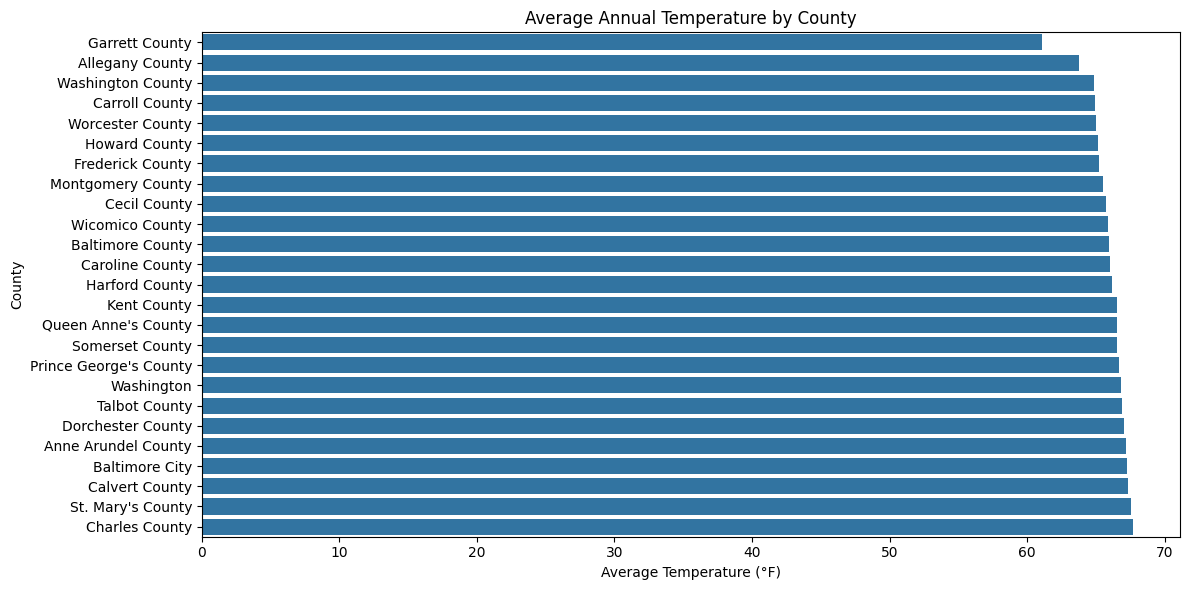

In [16]:
#plotting using 
temp_df_sorted = temp_df.sort_values('Avg_Annual_Temp', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Annual_Temp', y='County', data=temp_df_sorted)
plt.title('Average Annual Temperature by County')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('County')
plt.tight_layout()
plt.show()